# Model Evaluation and Refinement

#### Importing libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
%matplotlib inline

#### Loading the data

In [3]:
df = pd.read_csv('module_5_auto.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


First, let's only use numeric data:

In [5]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Let's remove the columns 'Unnamed:0.1' and 'Unnamed:0' since they do not provide any value to the models.

In [7]:
df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'] , axis = 1 , inplace = True)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


### Functions for plotting

In [8]:
def distribution_plot(red_function , blue_function , red_name , blue_name , title):
    plt.figure(figsize = (12 , 10))
    
    ax1 = sns.kdeplot(red_function , color = 'r' , label = red_name)
    ax2 = sns.kdeplot(blue_function , color = 'b' , label = blue_name , ax = ax1)
    
    plt.title(title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()
    plt.show()
    plt.close()

In [9]:
def polly_plot(x_train , x_test , y_train , y_test , lr , poly_transform):
    """
    x_train: training input features, 
    x_test: test input features,
    y_train: training output values, 
    y_test: test output values,
    lr: LinearRegression object, 
    poly_transform:  polynomial transformation object
    """
    plt.figure(figsize = (12 , 10))
    
    xmax = max(x_train.values.max() , x_test.values.max())
    xmin = max(x_train.values.min() , x_test.values.min())
    
    x = np.arange(xmin , xmax , 0.1)
    
    plt.plot(x_train , y_train , 'ro' , label = 'Training Data')
    plt.plot(x_test , y_test , 'go' , label = 'Test Data')
    
    x_poly = poly_transform.fit_transform(x.reshape(-1 , 1))
    y_pred = lr.predict(x_poly)
    plt.plot(x , y_pred , label = 'Predicted Function')
    
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h2>Part 1: Training and Testing</h2>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate pandas series <b>y_data</b>:</p>

In [12]:
y_data = df['price']

Drop price data in dataframe x_data:

In [15]:
x_data = df.drop('price' , axis = 1)

Now, we randomly split our data into training and testing data using the function train_test_split.

In [16]:
from sklearn.model_selection import train_test_split

In [35]:
x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , test_size = 0.1 , 
                                                       random_state = 1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


Let's import LinearRegression from the module linear_model.

In [36]:
from sklearn.linear_model import LinearRegression

We create a linear regression object:

In [37]:
lr = LinearRegression()

We fit the model using the feature "horsepower":

In [38]:
lr.fit(x_train[['horsepower']] , y_train)

LinearRegression()

Let's calculate the R^2 on the test data:

In [39]:
lr.score(x_test[['horsepower']] , y_test)

0.36358755750788263

We can see the R^2 is much smaller using the test data compared to the training data.

In [40]:
lr.score(x_train[['horsepower']] , y_train)

0.6619724197515104

Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.

## Cross Validation Score

Let's import cross_val_score from the module model_selection.

In [41]:
from sklearn.model_selection import cross_val_score

We input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4

In [46]:
Rcross = cross_val_score(lr , x_data[['horsepower']] , y_data , cv = 4)

The default scoring is R^2. Each element in the array has the average R^2 value for the fold:

In [47]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

We can calculate the average and standard deviation of our estimate:

In [48]:
print("The mean of the folds are", Rcross.mean() , "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'

In [49]:
cross_val_score(lr , x_data[['horsepower']] , y_data , cv = 4 , scoring = 'neg_mean_squared_error')

array([-20254142.84026702, -43745493.2650517 , -12539630.34014931,
       -17561927.7224759 ])

You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training. First, import the function:

In [50]:
from sklearn.model_selection import cross_val_predict

We input the object, the feature "horsepower", and the target data y_data. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:

In [52]:
y_pred = cross_val_predict(lr , x_data[['horsepower']],y_data , cv = 4)
y_pred[:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h2>Part 2: Overfitting, Underfitting and Model Selection</h2>

<p>It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world.  One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>

Let's create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.

In [54]:
mlr = LinearRegression()
mlr.fit(x_train[['horsepower', 'curb-weight', 'engine-size' , 'highway-mpg']] , y_train)

LinearRegression()

Prediction using training data:

In [56]:
yhat_train = mlr.predict(x_train[['horsepower', 'curb-weight', 'engine-size' , 'highway-mpg']])
yhat_train[:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

Prediction using test data:

In [58]:
yhat_test = mlr.predict(x_test[['horsepower', 'curb-weight', 'engine-size' , 'highway-mpg']])
yhat_test[:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Let's perform some model evaluation using our training and testing data separately

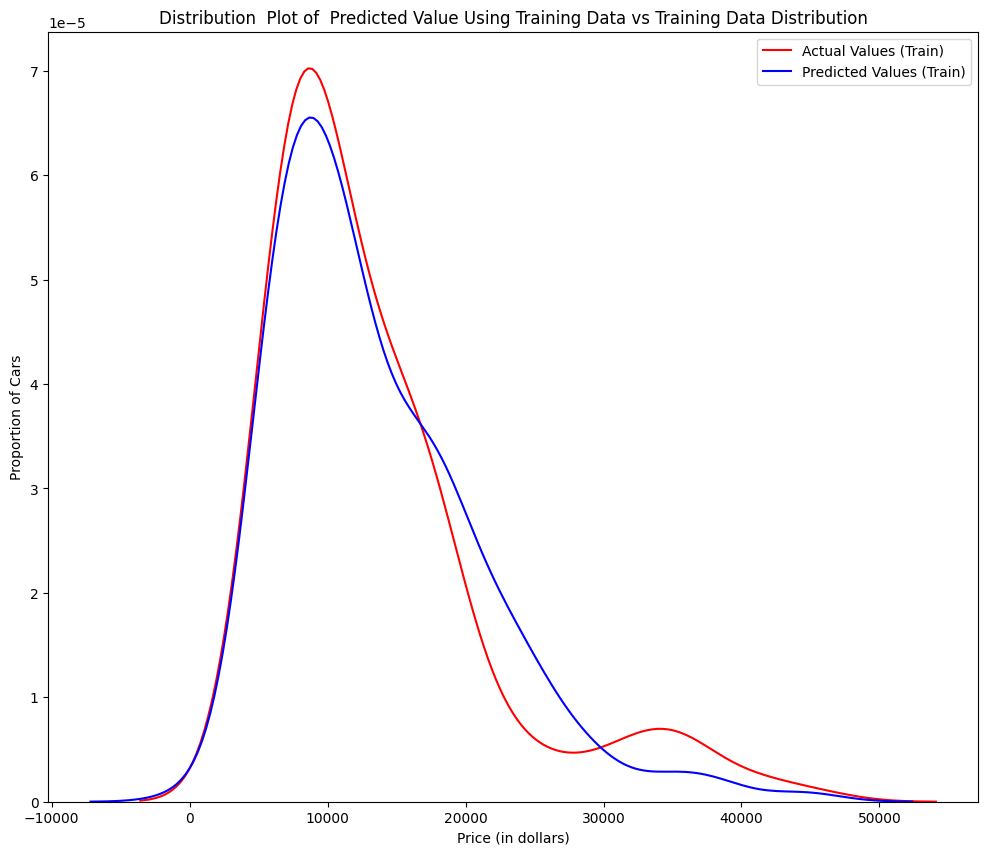

In [60]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
distribution_plot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.

So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.

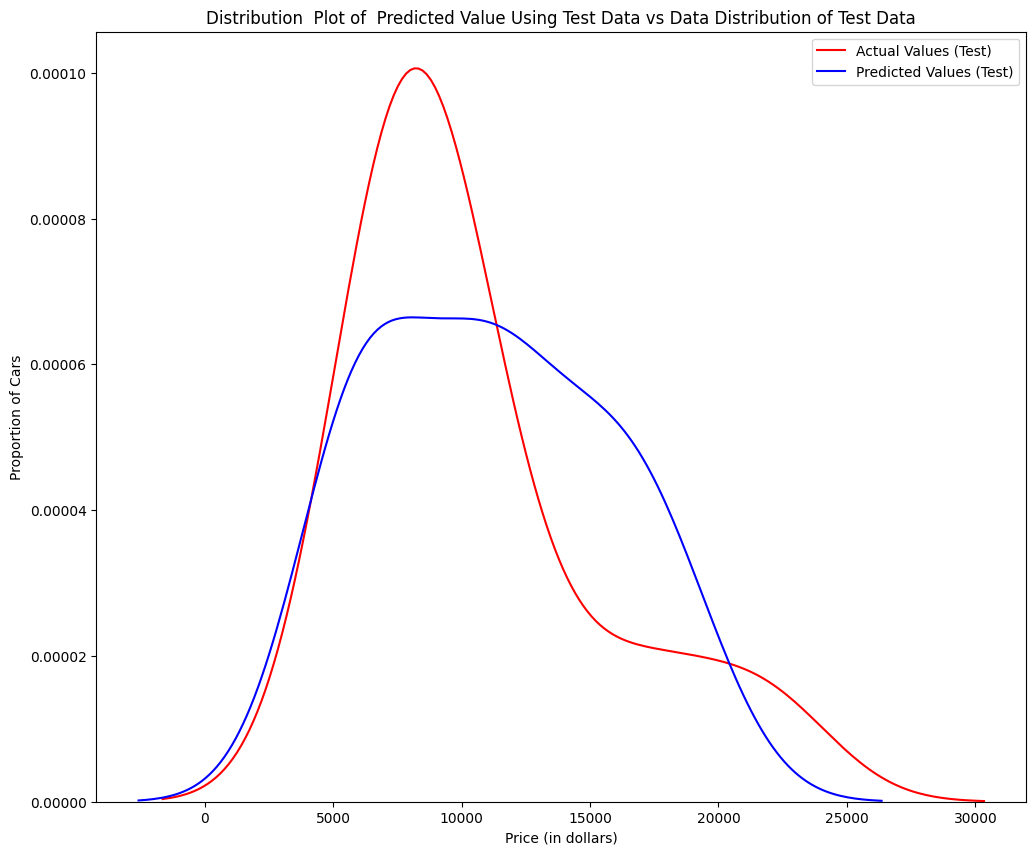

In [62]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
distribution_plot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [63]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>

Let's use 55 percent of the data for training and the rest for testing:

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature <b>'horsepower'</b>.

In [65]:
pr = PolynomialFeatures(degree = 5)
x_train_poly = pr.fit_transform(x_train[['horsepower']])
x_test_poly = pr.fit_transform(x_test[['horsepower']])

Now, let's create a Linear Regression model "poly" and train it.

In [67]:
poly = LinearRegression()
poly.fit(x_train_poly , y_train)

LinearRegression()

We can see the output of our model using the method "predict." We assign the values to "yhat".

In [68]:
yhat = poly.predict(x_test_poly)
yhat[:5]

array([ 6728.65566037,  7307.9878638 , 12213.7877412 , 18893.24796457,
       19995.95185894])

Let's take the first five predicted values and compare it to the actual targets.

In [69]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65566037  7307.9878638  12213.7877412  18893.24796457]
True values: [ 6295. 10698. 13860. 13499.]


We will use the function "polly_plot" that we defined at the beginning of the notebook to display the training data, testing data, and the predicted function.

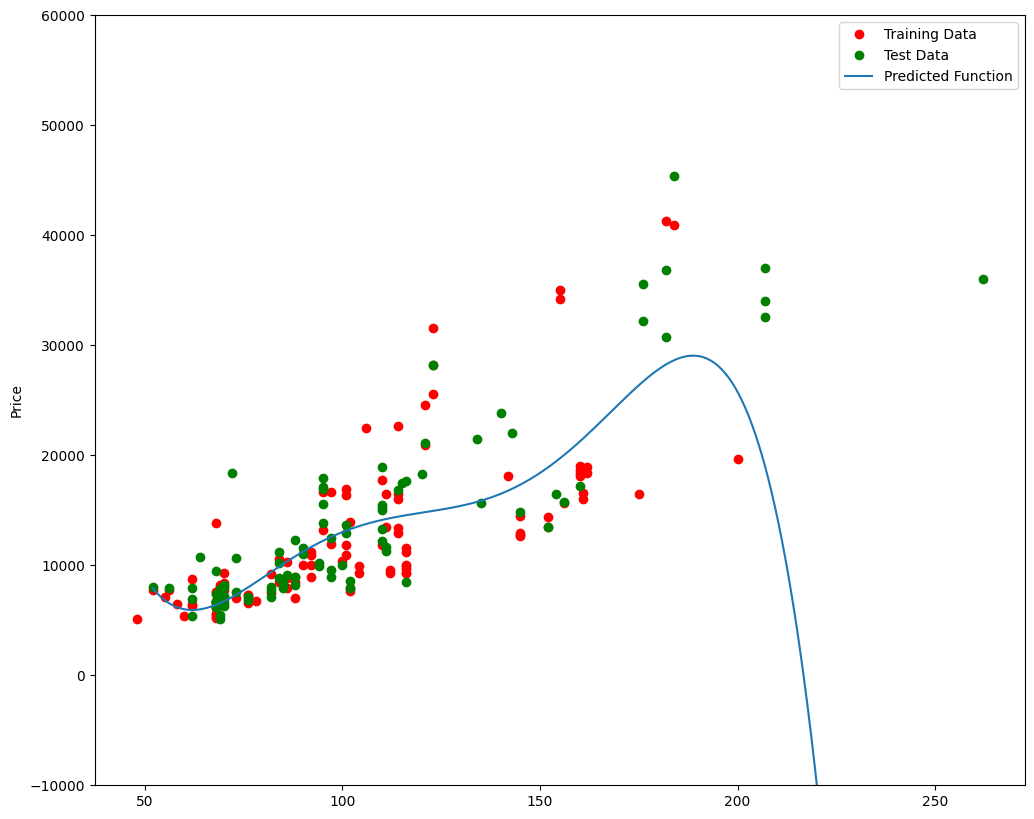

In [71]:
polly_plot(x_train[['horsepower']] , x_test[['horsepower']] , y_train , y_test , poly , pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.


We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

R^2 of the training and testing data:

In [73]:
print("R^2 of the training data: " , poly.score(x_train_poly , y_train))
print("R^2 of the testing data: " , poly.score(x_test_poly , y_test))

R^2 of the training data:  0.5567716902121724
R^2 of the testing data:  -29.87134054062532


We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:

Text(3, 0.75, 'Maximum R^2 ')

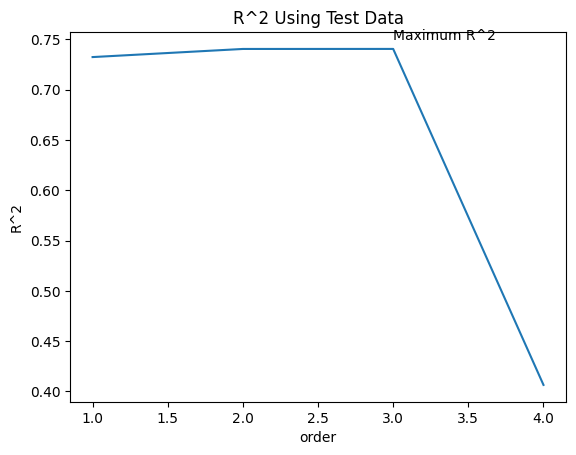

In [75]:
r_squ_test = []
order = [1 , 2 , 3 , 4]

for n in order:
    pr = PolynomialFeatures(degree = n)
    x_train_poly = pr.fit_transform(x_train[['horsepower']])
    x_test_poly = pr.fit_transform(x_test[['horsepower']])
    poly.fit(x_train_poly , y_train)
    r_squ_test.append(poly.score(x_test_poly , y_test))


plt.plot(order , r_squ_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')   

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

The following code allows you to experiment with different polynomial orders and different amounts of data.

In [76]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [79]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    polly_plot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [80]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

## Part 3: Ridge Regression

In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.

Let's perform a degree two polynomial transformation on our data.

In [81]:
pr = PolynomialFeatures(degree = 2)
x_train_poly = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_poly = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Let's import  <b>Ridge</b>  from the module <b>linear model</b>.


In [82]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter (alpha) to 1

In [83]:
ridge_model = Ridge(alpha = 1)

Like regular regression, you can fit the model using the method <b>fit</b>.

In [84]:
ridge_model.fit(x_train_poly , y_train)

Ridge(alpha=1)

Similarly, you can obtain a prediction:

In [86]:
yhat_ridge = ridge_model.predict(x_test_poly)
yhat_ridge[:5]

array([ 6570.82441941,  9636.24891471, 20949.92322737, 19403.60313256,
       21397.69847683])

In [88]:
!pip install tqdm --quiet

We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.

In [98]:
from tqdm import tqdm
r_squ_train = []
r_squ_test = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_poly, y_train)
    test_score, train_score = RigeModel.score(x_test_poly, y_test), RigeModel.score(x_train_poly, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    r_squ_test.append(test_score)
    r_squ_train.append(train_score)

100%|██████████████████| 1000/1000 [00:06<00:00, 156.37it/s, Test Score=0.564, Train Score=0.859]


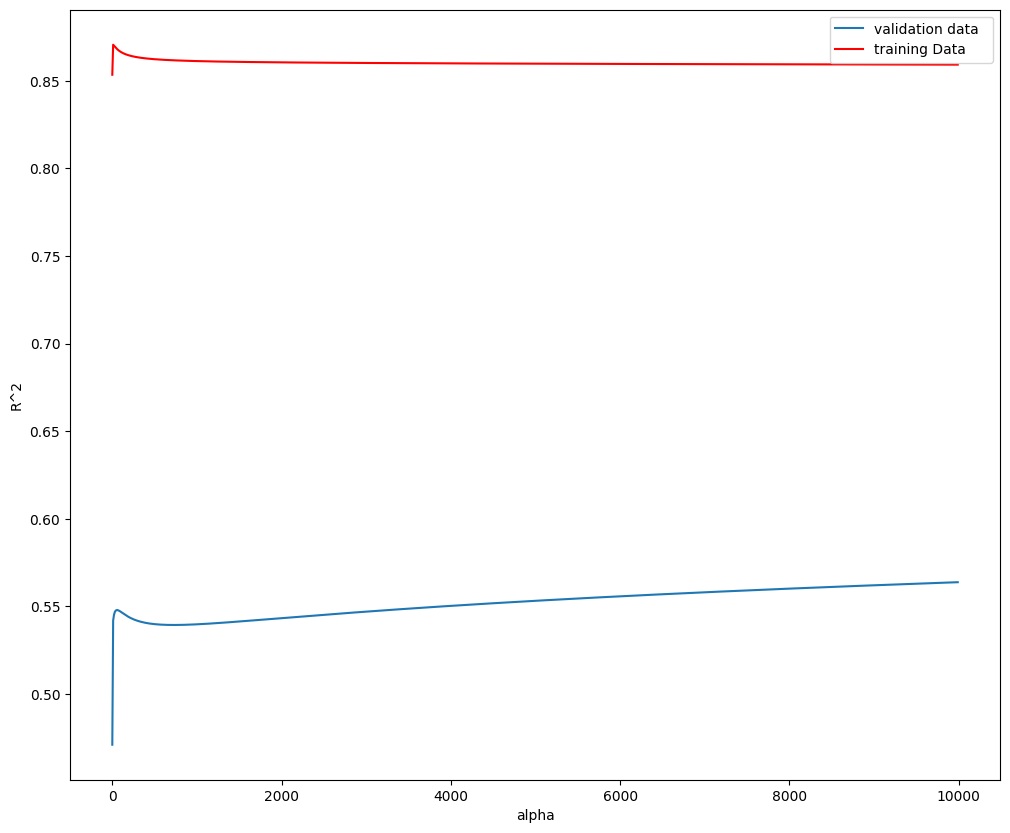

In [99]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,r_squ_test, label='validation data  ')
plt.plot(Alpha,r_squ_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

## Part 4: Grid Search

The term alpha is a hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [102]:
rr = Ridge()

In [103]:
grid1 = GridSearchCV(rr , parameters1 , cv = 4)

In [104]:
grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [105]:
grid1.best_estimator_

Ridge(alpha=10000)

In [106]:
best_rr = grid1.best_estimator_

We now test our model on the test data:

In [107]:
best_rr.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152